<a href="https://colab.research.google.com/github/FredMiraglia/projeto_analise_dados/blob/main/Regress%C3%A3o_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_eng_float_format(accuracy=2, use_eng_prefix=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [98]:
df = pd.read_csv('/content/drive/MyDrive/Python-Data-Science-and-Machine-Learning-Bootcamp/5. Machine Learning/Regressões Lineares/Ecommerce Customers')

In [99]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.50,12.66,39.58,4.08,587.95
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.93,11.11,37.27,2.66,392.20
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.00,11.33,37.11,4.10,487.55
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.31,13.72,36.72,3.12,581.85
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.33,12.80,37.54,4.45,599.41


In [100]:
df = df.iloc[:,3:]

In [101]:
df.columns = ['Duração média da sessão', 'Tempo no aplicativo', 'Tempo no site',
'Duração da assinatura', 'Valor anual gasto']

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Duração média da sessão  500 non-null    float64
 1   Tempo no aplicativo      500 non-null    float64
 2   Tempo no site            500 non-null    float64
 3   Duração da assinatura    500 non-null    float64
 4   Valor anual gasto        500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [103]:
df.describe()

,Duração média da sessão,Tempo no aplicativo,Tempo no site,Duração da assinatura,Valor anual gasto
count,500.00,500.00,500.00,500.00,500.00
mean,33.05,12.05,37.06,3.53,499.31
std,0.99,0.99,1.01,1.00,79.31
min,29.53,8.51,33.91,0.27,256.67
25%,32.34,11.39,36.35,2.93,445.04
50%,33.08,11.98,37.07,3.53,498.89
75%,33.71,12.75,37.72,4.13,549.31
max,36.14,15.13,40.01,6.92,765.52


In [104]:
df.isnull().sum()

,0
Duração média da sessão,0
Tempo no aplicativo,0
Tempo no site,0
Duração da assinatura,0
Valor anual gasto,0


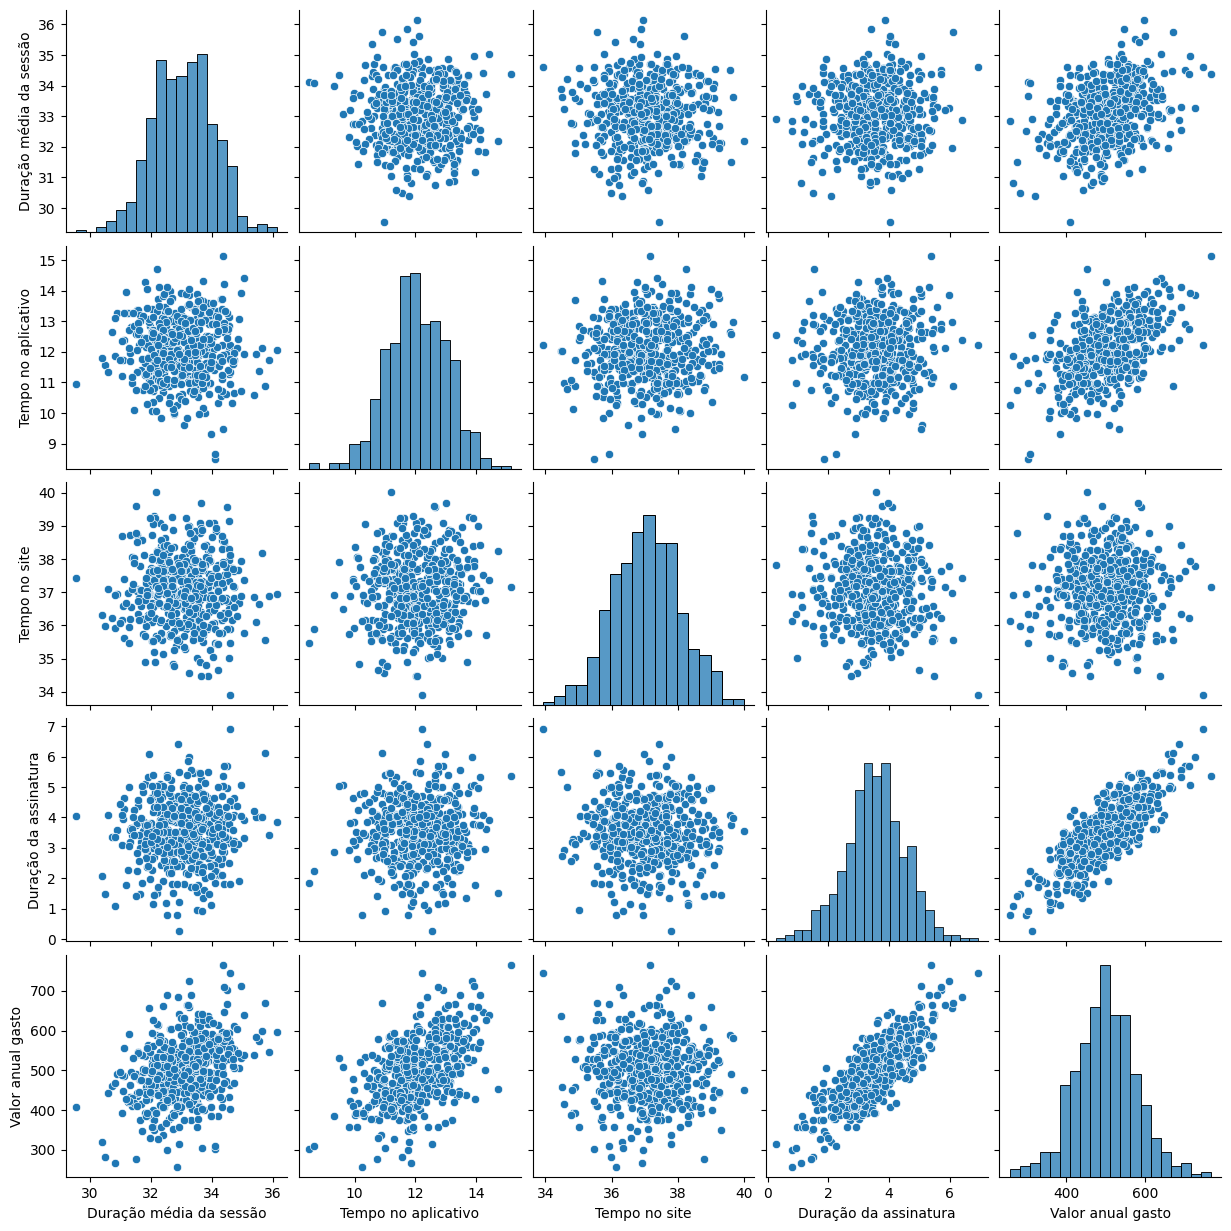

In [105]:
sns.pairplot(df)

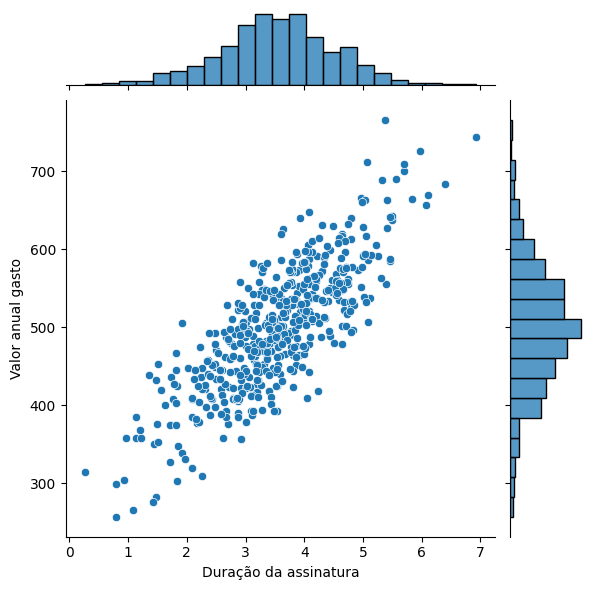

In [106]:
sns.jointplot(x='Duração da assinatura', y='Valor anual gasto', data=df)

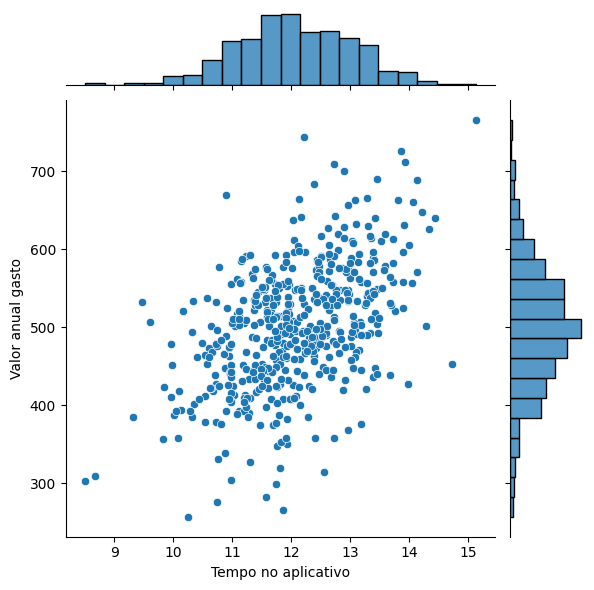

In [107]:
sns.jointplot(x='Tempo no aplicativo', y='Valor anual gasto', data=df)

<Axes: >

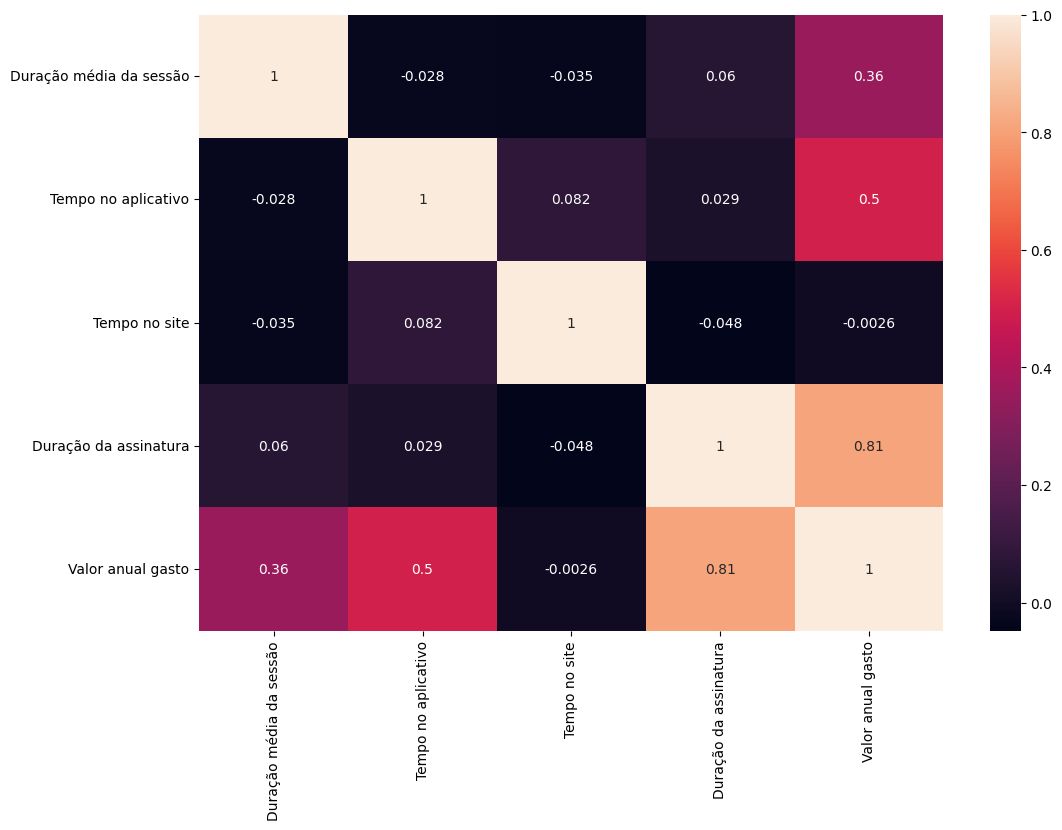

In [108]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

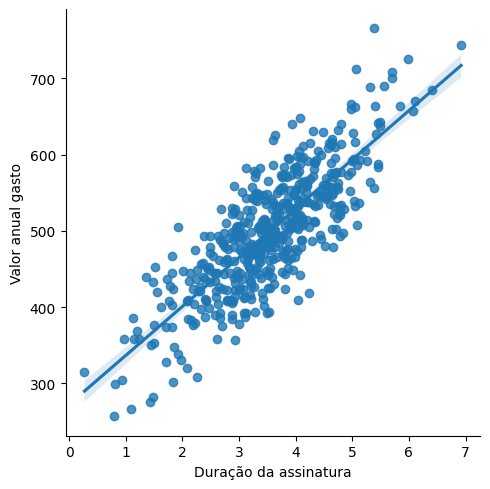

In [109]:
sns.lmplot(x='Duração da assinatura', y='Valor anual gasto', data=df)

In [110]:
X = df.drop('Valor anual gasto', axis=1)
y = df['Valor anual gasto']

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_teste, y_train, y_test = train_test_split(X, y, test_size=.3)

In [112]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred =  lr.predict(X_teste)

In [113]:
lr.coef_

array([25.62551519, 38.52618639,  0.47798522, 61.76127894])

<Axes: xlabel='Valor anual gasto'>

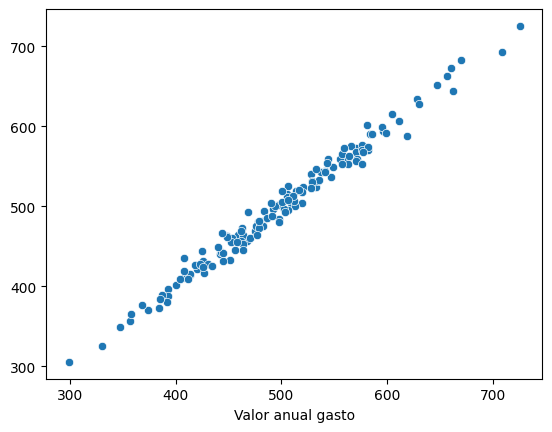

In [114]:
sns.scatterplot(x=y_test, y=pred)

In [115]:
pd.DataFrame(lr.coef_, X.columns, columns=['Coeficientes'])

,Coeficientes
Duração média da sessão,25.63
Tempo no aplicativo,38.53
Tempo no site,0.48
Duração da assinatura,61.76


In [116]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [117]:
print('MAE: ', mean_absolute_error(y_test, pred))
print('MSE: ', mean_squared_error(y_test, pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, pred)))

MAE:  7.34538159001271
MSE:  89.69859362965992
RMSE:  9.470934147678355


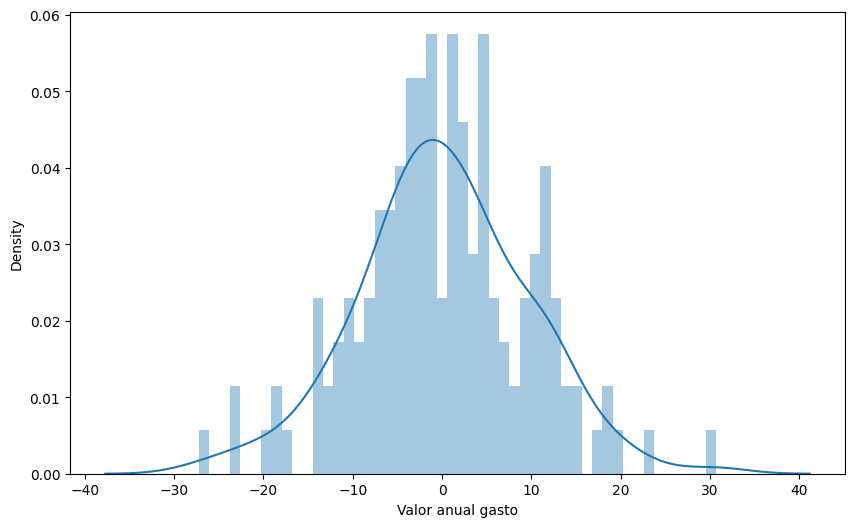

In [118]:
plt.figure(figsize=(10,6))
sns.distplot((y_test-pred), bins=50)
plt.show()